# Master project XENON100 LEC MAP
Cesium source

In [1]:
# Boilerplate startup code
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
from scipy.stats import norm


In [2]:
%matplotlib inline 
matplotlib.rc('font', size=16)                   # Use big fonts...
plt.rcParams['figure.figsize'] = (12.0, 10.0)    # ... and big plots

In [3]:
# Import the XENON100 configuration from pax
from pax.configuration import load_configuration
pax_config = load_configuration('XENON100')

In [4]:
import hax
hax.init(main_data_paths=['/home/xenon100ws/newcs']) #Folder containing the data

In [5]:
from pax import units

In [6]:
from IPython.core.display import Image

In [7]:
# Usefull minitree :
class AreaPerChannel(hax.minitrees.TreeMaker):
    # Activate the required branch while reading in the ROOT file
    # If you're too lazy to specify this, just put '*', but your TreeMaker will run slow!
    extra_branches = ['peaks.area_per_channel*', 'peaks.n_saturated_per_channel*']
    __version__ = '0.0.1'
    
    def extract_data(self, event):
        # If there are no interactions at all, we can't extract anything...
        if not len(event.interactions):
            return dict()
        
        # Get the main S1 and main S2
        s1 = event.peaks[event.interactions[0].s1]
        s2 = event.peaks[event.interactions[0].s2]
        
        # Get the main interaction
        interaction = event.interactions[0]
        
        temp_dict = {}
        for channel, s2_area in enumerate(s2.area_per_channel):
            temp_dict['s2_area_channel_%d' % channel] = s2_area
        for channel, s1_area in enumerate(s1.area_per_channel):
            temp_dict['s1_area_channel_%d' % channel] = s1_area
            # get back: number of saturated samples per channel
        return temp_dict

In [8]:
class R2 (hax.minitrees.TreeMaker):
    # Activate the required branch while reading in the ROOT file
    # If you're too lazy to specify this, just put '*', but your TreeMaker will run slow!
    extra_branches = ['']
    __version__ = '0.0.1'
    
    def extract_data(self, event):
        # If there are no interactions at all, we can't extract anything...
        if not len(event.interactions):
            return dict()
            
        # Get the main interaction
        interaction = event.interactions[0]
        
        # Get the main S1 and main S2
        s1 = event.peaks[event.interactions[0].s1]
        s2 = event.peaks[event.interactions[0].s2]
        
        return dict(r2= interaction.x**2+interaction.y**2)

In [9]:
class Photopeak (hax.minitrees.TreeMaker):
    extra_branches = ['area']
    __version__ = '0.0.1' 
    
    # Cut data not in the photopeak, using cS1 and cS2_tot_bottom values determined in a other note
    # "MasterProjectCs137"
    
    def extract_data(self, event):
       
        # If there are no interactions at all, we can't extract anything...
        if not len(event.interactions):
            return dict()
        
        # Get the main interaction
        interaction = event.interactions[0]
            
        # Get the main S1 and main S2
        s1 = event.peaks[event.interactions[0].s1]
        s2 = event.peaks[event.interactions[0].s2]
        
        event_data=dict()
        if len(event.interactions) !=0:
            if (s1.area * interaction.s1_area_correction >750) &(s1.area * interaction.s1_area_correction <1600):
                event_data['newcs1']=s1.area * interaction.s1_area_correction
            
            if ((1-s2.area_fraction_top)*interaction.s2_area_correction*s2.area) > 2e5:
                event_data['newcs2']=((1-s2.area_fraction_top)*interaction.s2_area_correction*s2.area)
              
        return event_data
       

# Cesium data :

In [10]:
dataset=['pax_v410_xe100_110912_1809','pax_v410_xe100_110927_1949']


In [73]:
# use hax on our data
data = hax.minitrees.load(dataset, treemakers=[Photopeak, 'Basics'], force_reload=True)
print(len(data))

Found minitree at ./pax_v410_xe100_110912_1809_Photopeak.root


  0%|          | 0/50000 [00:00<?, ?it/s]

Don't know a dataset named pax_v410_xe100_110912_1809, trying to find it anyway...


100%|██████████| 50000/50000 [00:05<00:00, 8860.53it/s]


Created minitree Photopeak for dataset pax_v410_xe100_110912_1809


  2%|▏         | 1048/50000 [00:00<00:04, 10478.19it/s]

Found minitree at ./pax_v410_xe100_110927_1949_Photopeak.root
Don't know a dataset named pax_v410_xe100_110927_1949, trying to find it anyway...


100%|██████████| 50000/50000 [00:03<00:00, 13045.16it/s]


Created minitree Photopeak for dataset pax_v410_xe100_110927_1949


  0%|          | 174/50000 [00:00<00:43, 1139.33it/s]

Found minitree at ./pax_v410_xe100_110912_1809_Basics.root
Don't know a dataset named pax_v410_xe100_110912_1809, trying to find it anyway...


100%|██████████| 50000/50000 [00:20<00:00, 2422.41it/s]


Created minitree Basics for dataset pax_v410_xe100_110912_1809


  0%|          | 175/50000 [00:00<00:43, 1140.75it/s]

Found minitree at ./pax_v410_xe100_110927_1949_Basics.root
Don't know a dataset named pax_v410_xe100_110927_1949, trying to find it anyway...


100%|██████████| 50000/50000 [00:15<00:00, 3274.81it/s]


Created minitree Basics for dataset pax_v410_xe100_110927_1949
100000


In [12]:
data.head(3)

,index,newcs1,newcs2,index,cs1,cs2,dataset_number,drift_time,event_number,event_time,...,largest_other_s2,largest_unknown,largest_veto,s1,s1_area_fraction_top,s2,s2_area_fraction_top,x,y,z
0,0,NaN,223258.583779,0,731.429381,355478.625739,1.109122e+09,103760.0,0,1315843769022210048,...,348.659546,0.0,12.950220,727.070740,0.138601,208749.609375,0.371949,-13.392655,-1.833333,-17.95048
1,1,1015.413832,281154.936969,1,1015.413832,423343.395965,1.109122e+09,26270.0,1,1315843769053153024,...,88387.585938,0.0,1.658993,746.148865,0.311309,288087.031250,0.335870,-4.132768,5.624294,-4.54471
2,2,1090.551824,389170.090975,2,1090.551824,585470.915461,1.109122e+09,79370.0,2,1315843769078991872,...,1799.754883,0.0,4.937278,1065.697266,0.184749,360824.062500,0.335287,-3.138418,-1.895480,-13.73101


In [13]:
# cut data with newcs1 == nan
data= data[(data['newcs1']>0)&(data['newcs2']>0)]
print('Number of events =',len(data))

Number of events = 22962


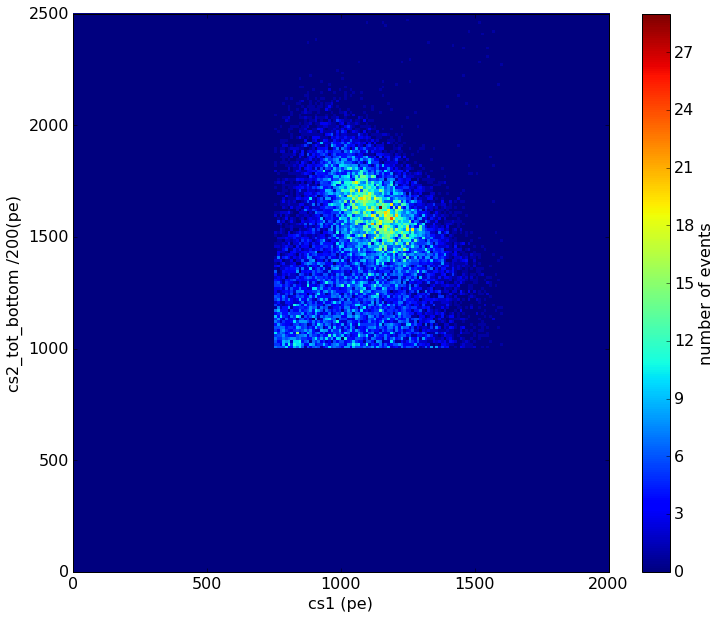

In [14]:
plt.hist2d(data['newcs1'],data['newcs2']/200, bins=200, range=[[0,2000],[0,2500]])
plt.colorbar(label='number of events')
plt.xlabel('cs1 (pe)')
plt.ylabel('cs2_tot_bottom /200(pe)')
plt.show()

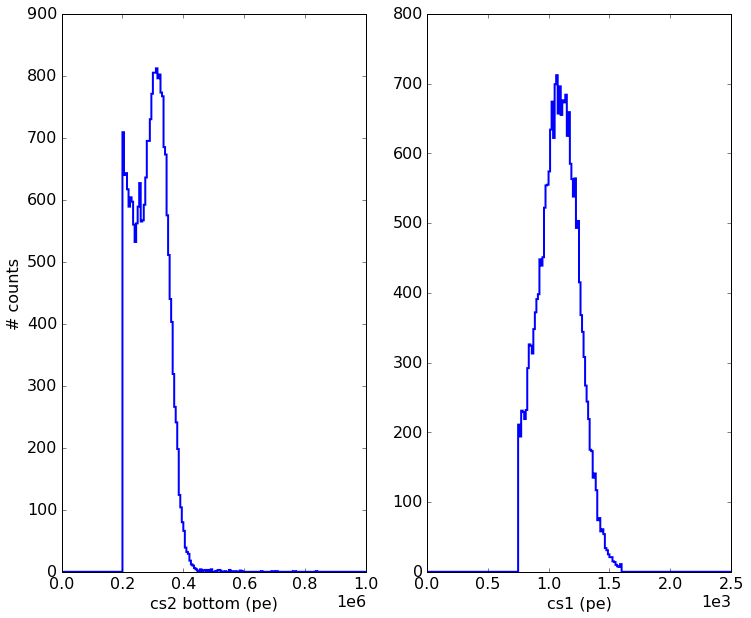

In [15]:

new_cs2_tot_bottom = data['newcs2']
new_cs1 =data['newcs1']

plt.subplot(121)
plt.hist(new_cs2_tot_bottom, bins = 200 , range=[0,1e6],histtype='step',lw=2)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ylabel('# counts')
plt.xlabel('cs2 bottom (pe)')


plt.subplot(122)
plt.hist(new_cs1, bins = 200 , range=[0,2500],histtype='step',lw=2)


plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.xlabel('cs1 (pe)')

plt.show()

# Combined Energy Scale (CES)
Erik's code

In [16]:
from recarray_tools import filter_on_fields, group_by, append_fields
from tqdm import tqdm
from scipy.optimize import curve_fit
from pax.formats import flat_data_formats
file_format = 'hdf5'
ioformat = flat_data_formats[file_format]()

In [17]:
# Some functions that'll be used
def func_poly_2(x,a,b,c):
    return a + b*x + c*x**2
def func_exp(x,a,tau):
    return a*np.exp(-x/tau)
def func_gauss(x,A,mu,sig):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

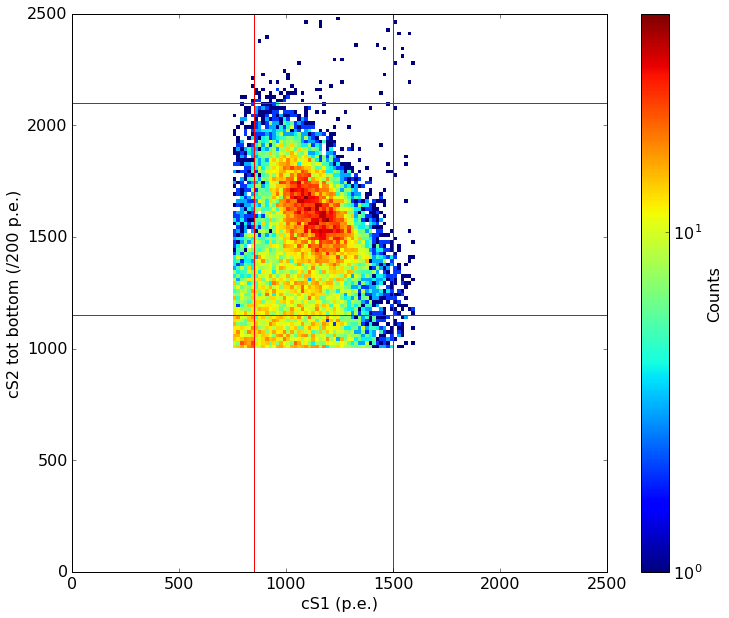

In [18]:
# We have to fit a Gaussian fonction to the ellipse in the red lines
from matplotlib.colors import LogNorm


plt.hist2d(np.array(new_cs1),np.array(new_cs2_tot_bottom)/200, bins=(150,150), range =([0,2500],[0,2500]),cmin=1,norm=LogNorm())
plt.colorbar(label = 'Counts')
plt.xlabel("cS1 (p.e.)")
plt.ylabel("cS2 tot bottom (/200 p.e.)")
plt.axvline(850,color='red')
plt.axvline(1500,color='red')
plt.axhline(1150,color='red')
plt.axhline(2100,color='red')



plt.show()

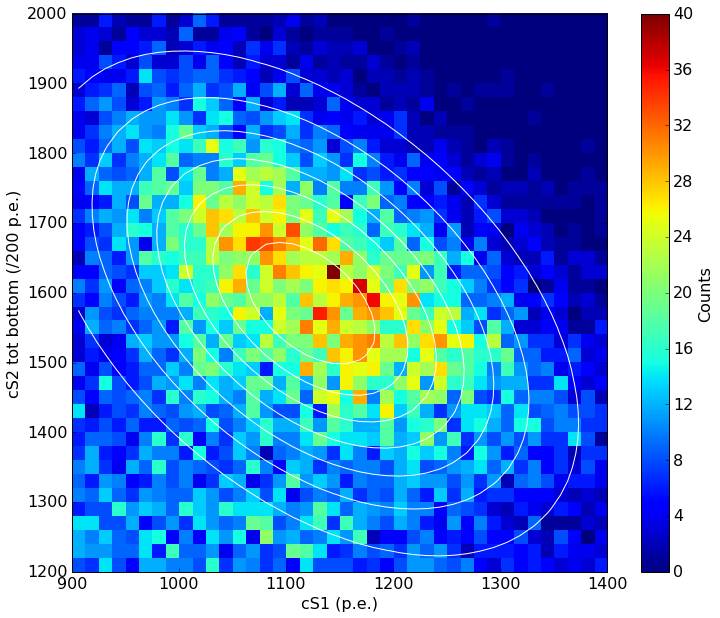

[  2.37046509e+01   1.12283454e+03   1.58484202e+03   1.91421327e+02
   1.00425337e+02   1.12052137e+00   3.00513491e+00]


In [19]:
# Settings!
binsize = 40
range_s1 = (900,1400)
range_s2 = (1200,2000)

# This is the function to fit
def twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    (x, y) = xdata_tuple 
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

s1s2hist = plt.hist2d(np.array(new_cs1),(np.array(new_cs2_tot_bottom)/200),
         bins=(binsize,binsize),range=(range_s1,range_s2))
plt.colorbar(label = 'Counts')
plt.xlabel("cS1 (p.e.)")
plt.ylabel("cS2 tot bottom (/200 p.e.)")
hist_counts,hist_s1, hist_s2, _ = s1s2hist

# Transform bin EDGES to bin CENTERS (decreases size by one)
x_fit_1d =[(hist_s1[i+1]+hist_s1[i])/2
           for i in range(len(hist_s1)-1)]
y_fit_1d =[(hist_s2[i+1]+hist_s2[i])/2
           for i in range(len(hist_s2)-1)]

x_flat = []
y_flat = []
z_flat = []

# Loop over all combinations of x and y coordinates and add x, y and z into one n x n list each
# Has been checked.

for i_y in range(len(y_fit_1d)):
    for i_x in range(len(x_fit_1d)):
        x_flat.append(x_fit_1d[i_x])
        y_flat.append(y_fit_1d[i_y])
        z_flat.append(hist_counts[i_x,i_y])
        
# twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):

initial_guess = (20,1140,1550,100,500,0.78,0)

popt, pcov = curve_fit(twoD_Gaussian, (x_flat, y_flat), z_flat, p0=initial_guess)
perr = np.sqrt(np.diag(pcov))

# For plotting purposes
data_fitted = np.array([twoD_Gaussian((x, y), *popt)
               for x in x_fit_1d
               for y in y_fit_1d]).flatten()


plt.contour(x_fit_1d, y_fit_1d, data_fitted.reshape(binsize,binsize,order ='F'), 8,colors='w')


plt.show()

print(popt)

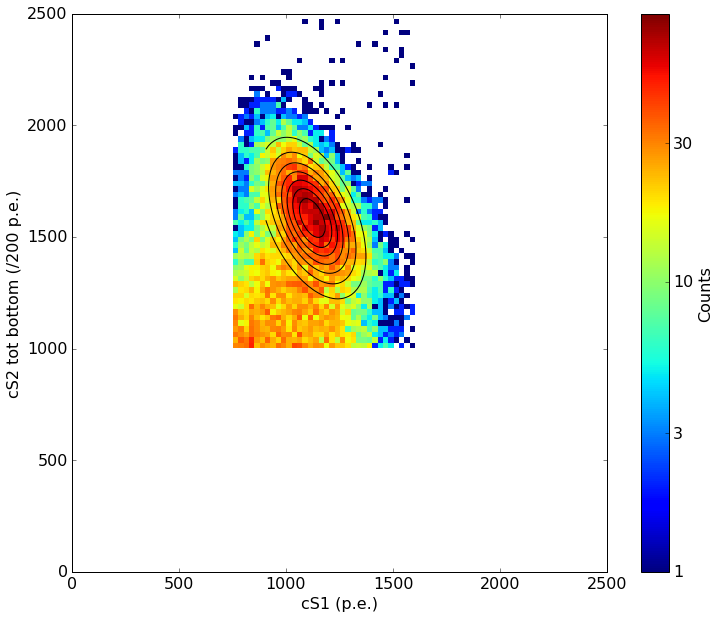

In [20]:

plt.hist2d(np.array(new_cs1),np.array(new_cs2_tot_bottom)/200,
           bins=(100,100),range=((0,2500),(0,2500)),cmin=1,norm=LogNorm())
cbar = plt.colorbar(label = 'Counts',ticks=[1,3,10,30,100])
cbar.set_ticklabels([1,3,10,30,100])
plt.xlabel("cS1 (p.e.)")
plt.ylabel("cS2 tot bottom (/200 p.e.)")
plt.contour(x_fit_1d, np.array(y_fit_1d), data_fitted.reshape(binsize,binsize,order ='F'), 8,colors='black')




plt.show()

In [21]:
# We are moving to energy space!
mte1=popt[1]
mte2=popt[2]
energy_cs1= np.array(new_cs1)/popt[1]*662
energy_cs2=(np.array(new_cs2_tot_bottom)/200)/popt[2]*662
print(energy_cs1)
print(energy_cs2)

[ 598.66697254  642.96677678  689.03104636 ...,  691.79391255  554.92289993
  660.25751828]
[ 587.20227492  812.79583853  672.79717242 ...,  683.55467206  796.88532546
  692.08077696]


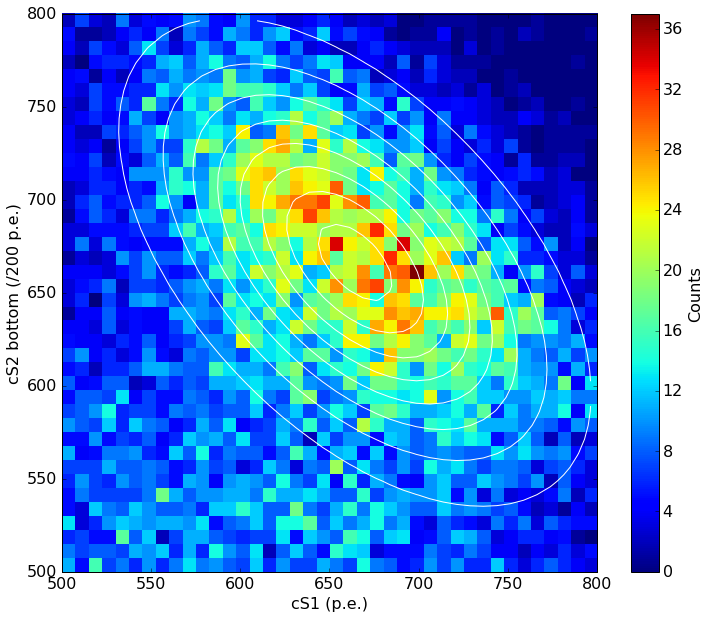

[  2.08007608e+01   6.64325946e+02   6.66500716e+02   6.21026110e+01
   6.15996639e+01  -5.42114686e-01   5.34349950e+00]


In [22]:
# Settings:
binsize = 40
range_s1 = (500,800)
range_s2 = (500,800)

# Better function!
def bivar(xdata_tuple, amplitude, xo,yo,sigma_x,sigma_y,rho,offset):
    (x, y) = xdata_tuple 
    xo = float(xo)
    yo = float(yo)  
    return offset + amplitude*np.exp((-1/(2*(1-rho**2)))*((x-xo)**2/(sigma_x**2) + 
                                                          (y-yo)**2/(sigma_y**2) -
                                                          2*rho*(x-xo)*(y-yo)/(sigma_x*sigma_y)) 
                                    )

s1s2hist = plt.hist2d(np.array(energy_cs1),np.array(energy_cs2), bins=(binsize,binsize),range=(range_s1,range_s2))
plt.colorbar(label = 'Counts')
plt.xlabel("cS1 (p.e.)")
plt.ylabel("cS2 bottom (/200 p.e.)")

# hist_counts: binsize x binsize array of number of counts
# s1 / s2: binsize+1 array of edges

hist_counts,hist_s1, hist_s2, _ = s1s2hist

# Transform bin EDGES to bin CENTERS (decreases size by one)
x_fit_1d =[(hist_s1[i+1]+hist_s1[i])/2
           for i in range(len(hist_s1)-1)]
y_fit_1d =[(hist_s2[i+1]+hist_s2[i])/2
           for i in range(len(hist_s2)-1)]

x_flat = []
y_flat = []
z_flat = []

# Loop over all combinations of x and y coordinates and add x, y and z into one n x n list each
# Has been checked.
for i_y in range(len(y_fit_1d)):
    for i_x in range(len(x_fit_1d)):
        x_flat.append(x_fit_1d[i_x])
        y_flat.append(y_fit_1d[i_y])
        z_flat.append(hist_counts[i_x,i_y])
        
# twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
initial_guess = (20,662,662,100,100,0.78,0)
popt, pcov = curve_fit(bivar, (x_flat, y_flat), z_flat, p0=initial_guess)
perr = np.sqrt(np.diag(pcov))

# For plotting purposes
data_fitted = np.array([bivar((x, y), *popt)
               for x in x_fit_1d
               for y in y_fit_1d]).flatten()


plt.contour(x_fit_1d, y_fit_1d, data_fitted.reshape(binsize,binsize,order ='F'), 8,colors='w')



plt.show()
print(popt)


anticorrelation angle= -0.777898737557 rad


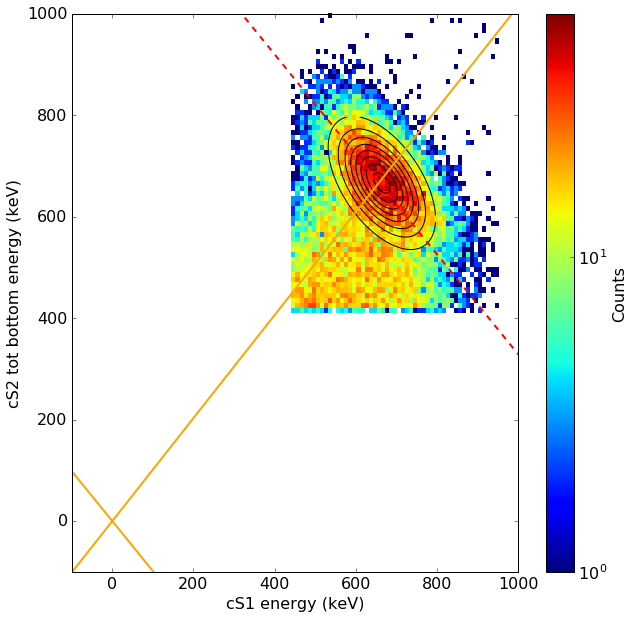

In [23]:
plt.figure(figsize=(10,10))
plt.hist2d(np.array(energy_cs1),np.array(energy_cs2),
           bins=(100,100),range=((0,1000),(0,1000)),cmin=1,norm=LogNorm())
plt.colorbar(label = 'Counts')
plt.xlabel("cS1 energy (keV)")
plt.ylabel("cS2 tot bottom energy (keV)")
plt.contour(x_fit_1d, np.array(y_fit_1d), data_fitted.reshape(binsize,binsize,order ='F'), 8,colors='black')


sigma_x  = popt[3]
sigma_y  = popt[4]
rho = popt[5]


theta=0.5*np.arctan(2*rho*(sigma_x*sigma_y)/(sigma_x**2-sigma_y**2))

# theta=theta-np.pi/2 # Angle definition

print('anticorrelation angle=', theta,'rad')


x_list = [x for x in np.arange(-2000,2000,1.)]
v_axis = [-x*np.cos(theta)/np.sin(theta) for x in x_list]
u_axis = [x*np.tan(theta) for x in x_list]

c = 662.*np.cos(theta)-662.*np.sin(theta)

u_axis_2 = [x*np.tan(theta) + c/np.cos(theta) for x in x_list]
v_axis_2 = [-x*np.cos(theta)/np.sin(theta) + c/np.sin(theta) for x in x_list]

plt.plot(x_list,u_axis,color='orange',lw=2)
plt.plot(x_list,v_axis,color='orange',lw=2)
plt.plot(x_list,u_axis_2,color='red',lw=2,ls='--')

plt.xlim(-100,1000)
plt.ylim(-100,1000)


plt.show()

Projection of the energy along the large axis of the ellipse

anticorrelation angle= -0.777898737557 rad


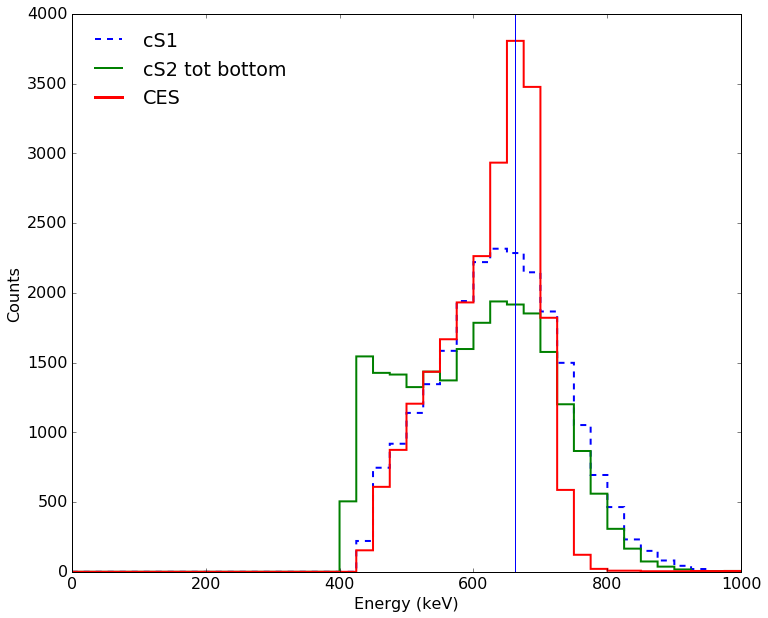

In [24]:
# http://2.bp.blogspot.com/-G-KLeae_EYU/TgdtpzntqvI/AAAAAAAABrI/Rv8Iea9zFVQ/s1600/Screen%2Bshot%2B2011-06-26%2Bat%2B1.33.51%2BPM.png

theta = 0.5*np.arctan(2*rho*(sigma_x*sigma_y)/(sigma_x**2-sigma_y**2))
# theta=theta-np.pi/2 # Angle definition

print('anticorrelation angle=',theta,'rad')

# u = x cos(th) + y sin(th)
# v = y cos(th) - x sin(th)
peak_v = 662.*np.cos(theta)-662.*np.sin(theta)

# Parameters for plotting
myrange = (0,1000)
mybins = 40

# Produce histograms
plt.hist(np.array(energy_cs1),bins=mybins,histtype='step',label='cS1',range=myrange,linestyle='dashed',lw=2)
plt.hist(np.array(energy_cs2),bins=mybins,histtype='step',label='cS2 tot bottom',range=myrange,lw=2)
plt.hist(662./peak_v*(-np.array(energy_cs1)*np.sin(theta)+np.array(energy_cs2)*np.cos(theta)),bins=mybins,
         histtype='step',label='CES',range=myrange,lw=2)

# Legend
p1,  = plt.plot(0,0,color='blue',linestyle='dashed',lw=2)
p2,  = plt.plot(0,0,color='green',lw=2)
p3,  = plt.plot(0,0,color='red',lw=3)
l1 = plt.legend([p1,p2,p3], ["cS1","cS2 tot bottom","CES"], loc='upper left',frameon=False)

plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.axvline(662)


plt.show()

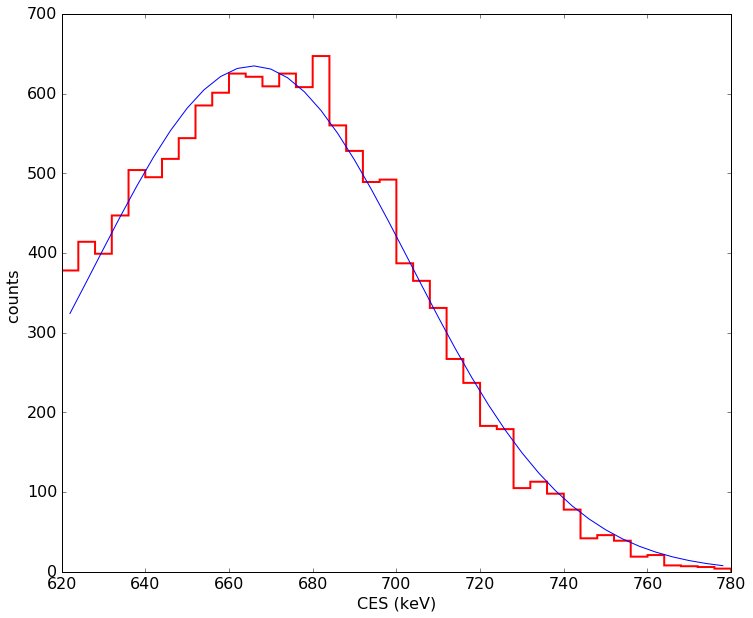

[ 634.63360571  665.77741194  -37.75786523]
sigma_CES= -37.7578652303


In [25]:
# Fit an one dimentional Gaussian function to CES to determine the standard deviation
# Settings!
binsize = 40
myrange=(620,780)
mybins=40
# This is the function to fit
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# p is the initial guess

CEShist = plt.hist(662./peak_v*(-np.array(energy_cs1)*np.sin(theta)+np.array(energy_cs2)*np.cos(theta)),bins=mybins,
         histtype='step',label='CES',range=myrange,lw=2, color='red')


plt.xlabel("CES (keV)")
plt.ylabel("counts ")

hist_counts,hist_energy,_=CEShist

# Transform bin EDGES to bin CENTERS (decreases size by one)
x_fit_1d =[(hist_energy[i+1]+hist_energy[i])/2
           for i in range(0,len(hist_energy)-1)]

x_flat = []
y_flat = []


#  Loop over all combinations of x and y coordinates and add x, y and z into one n x n list each
#  Has been checked.

for i_x in range(len(x_fit_1d)):
    x_flat.append(x_fit_1d[i_x])
    y_flat.append(hist_counts[i_x])
        
#  oneD_Gaussian:

initial_guess = (400,662,100)

popt, pcov = curve_fit(gauss,x_flat, y_flat, p0=initial_guess)
perr = np.sqrt(np.diag(pcov))

#  For plotting purposes
data_fitted = np.array([gauss(x, *popt)
               for x in x_fit_1d]).flatten()

plt.plot(x_fit_1d, data_fitted.reshape(binsize,order ='F'))

plt.show()

print(popt)
sigma_CES=popt[2]
print('sigma_CES=', popt[2])

Standard deviation = -37.75786

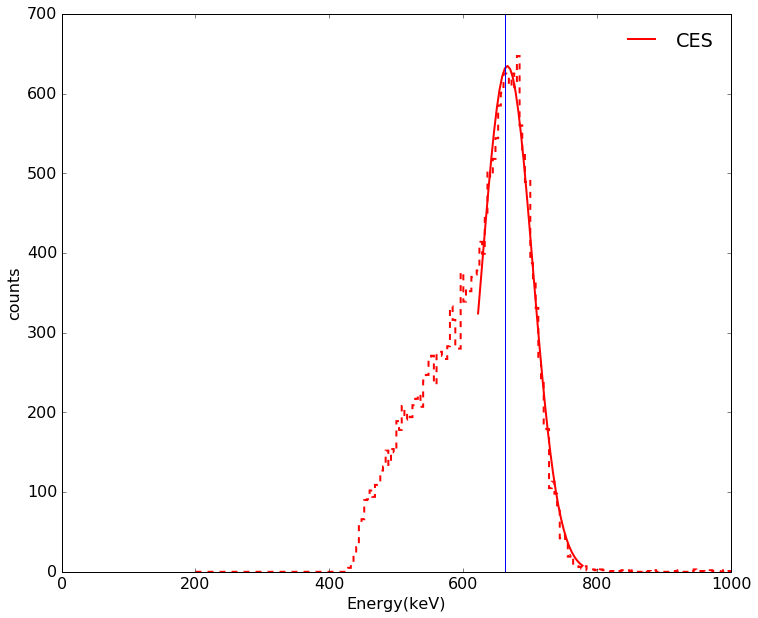

In [26]:
myrange=(200,1000)
binsize=40
plt.hist(662./peak_v*(-np.array(energy_cs1)*np.sin(theta)+np.array(energy_cs2)*np.cos(theta)),bins=200,
         histtype='step',label='CES',range=myrange,lw=2, linestyle ='dashed',color='red')

plt.xlabel("Energy(keV)")
plt.ylabel("counts")
         
plt.plot(x_fit_1d, data_fitted.reshape(binsize,order ='F'),color='red', lw=2)
# Legend
p1,  = plt.plot(0,0,color='red',lw=2)

l1 = plt.legend([p1], ["CES"], loc='upper right',frameon=False)
plt.axvline (662)
# plt.axvline(662+37.7)
# plt.axvline(662-37.7)
plt.show()

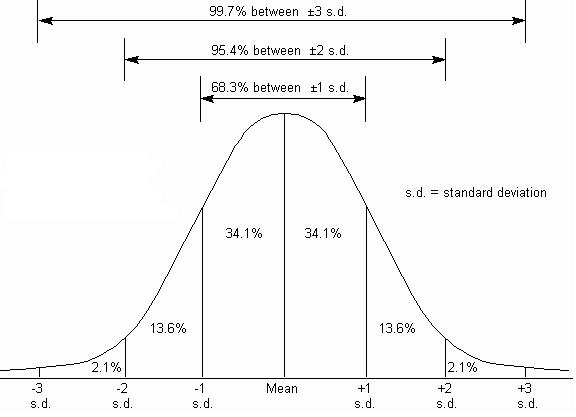

In [27]:
Image('http://www.biologyforlife.com/uploads/2/2/3/9/22392738/8058314_orig.jpg')

# Events between $\pm$ 1 $\sigma$ (68.3%)

In [28]:
CES=np.array(662./peak_v*(-np.array(energy_cs1)*np.sin(theta)+np.array(energy_cs2)*np.cos(theta)))
dataE1s=data[(CES>662+sigma_CES) & (CES<662-sigma_CES)]
CESselect1s= CES[(CES>662+sigma_CES)&(CES<662-sigma_CES)] 
len(CESselect1s)

10257

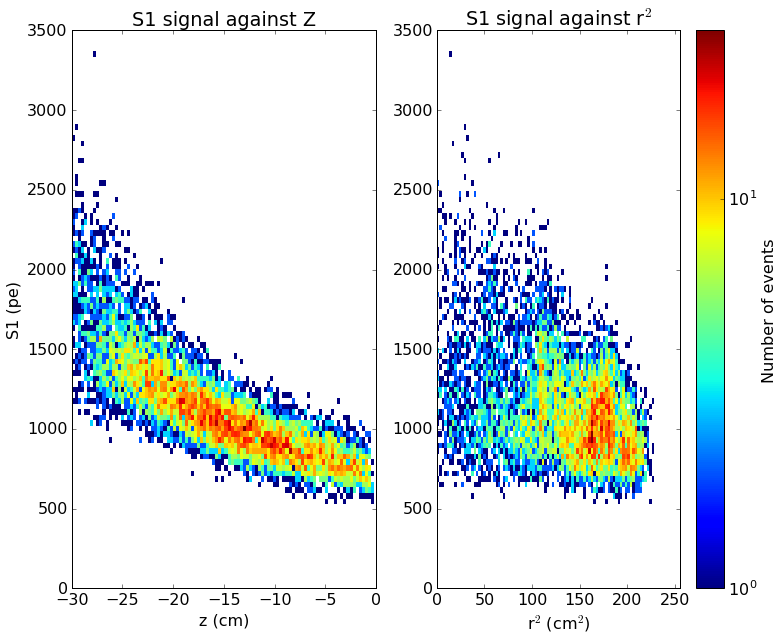

In [77]:
plt.subplot(121)
plt.hist2d(dataE1s['z'], dataE1s['s1'],range = [[-30,0],[0,3500]],
           bins=100,
           norm=matplotlib.colors.LogNorm()   # Logarithmic color scale
)

plt.xlabel('z (cm)')
plt.ylabel('S1 (pe)')
plt.title('S1 signal against Z')

plt.subplot(122)
plt.hist2d(dataE1s['x']**2+dataE1s['y']**2, dataE1s['s1'],range = [[0,16**2],[0,3500]],
           bins=100,
           norm=matplotlib.colors.LogNorm()   # Logarithmic color scale
)
plt.colorbar(label='Number of events')
plt.xlabel('r$^2$ (cm$^2$)')

plt.title('S1 signal against r$^2$')

plt.show()

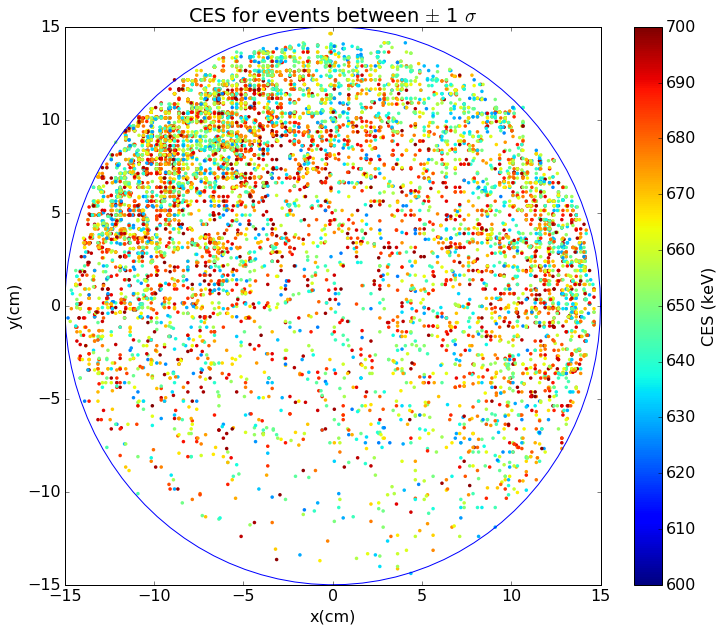

In [79]:

plt.scatter(dataE1s['x'],dataE1s['y'],c=CESselect1s,edgecolor='none', marker='.', s=50, vmin=600, vmax=700 )
plt.xlabel('x(cm)')
plt.ylabel('y(cm)')
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.colorbar(label='CES (keV)')

theta = np.linspace(0, 2*np.pi, 100)

x = 15*np.cos(theta)
y = 15*np.sin(theta)
plt.plot(x, y)
plt.title('CES for events between $\pm$ 1 $\sigma$')
plt.show()

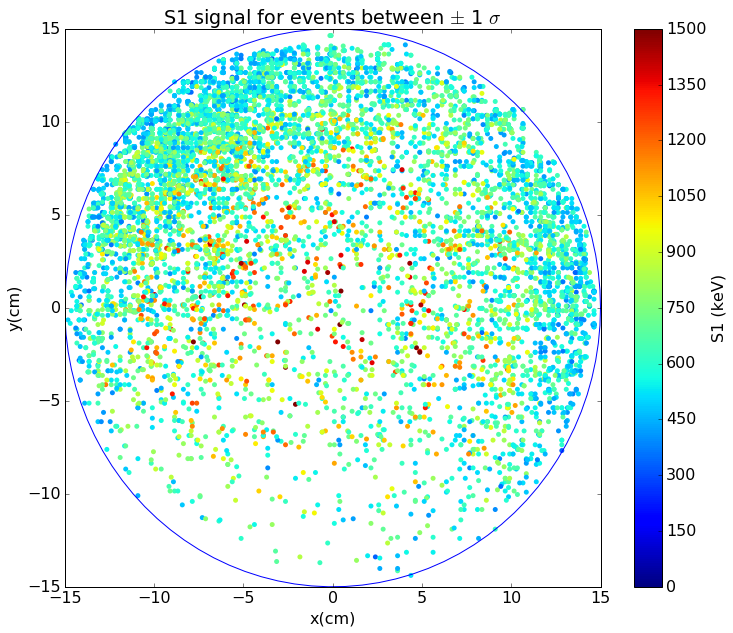

In [81]:
plt.scatter(dataE1s['x'],dataE1s['y'], c=dataE1s['s1']/mte1*662, 
            edgecolor='none', marker='.', s=100, vmin=0, vmax=1500 )
plt.xlabel('x(cm)')
plt.ylabel('y(cm)')
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.colorbar(label='S1 (keV)')
theta = np.linspace(0, 2*np.pi, 100)

x = 15*np.cos(theta)
y = 15*np.sin(theta)
plt.plot(x, y)
plt.title('S1 signal for events between $\pm$ 1 $\sigma$')
plt.show()

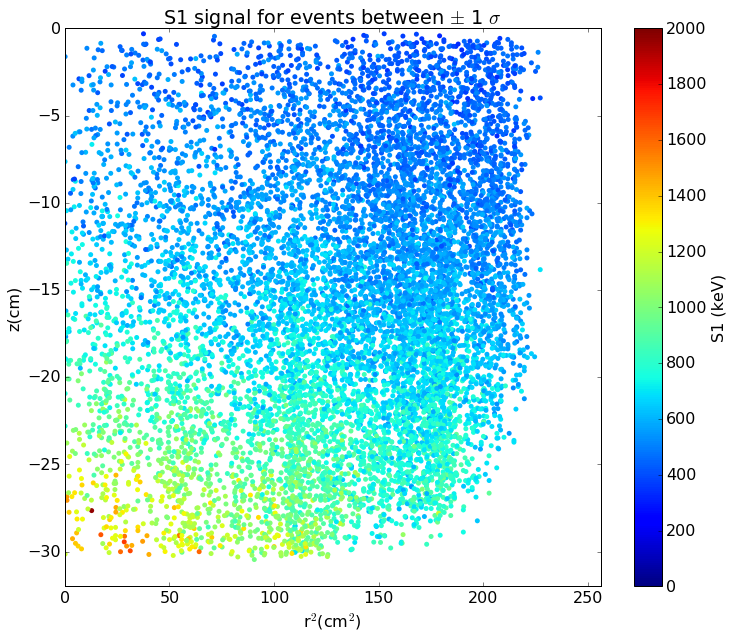

In [82]:
plt.scatter(dataE1s['x']**2+dataE1s['y']**2,dataE1s['z'], c=dataE1s['s1']/mte1*662, 
            edgecolor='none', marker='.', s=100, vmin=0, vmax=2000 )
plt.ylabel('z(cm)')
plt.xlabel('r$^2$(cm$^2$)')
plt.ylim(-32,0)
plt.xlim(0,16**2)
plt.colorbar(label='S1 (keV)')
# theta = np.linspace(0, 2*np.pi, 100)

# x = 15*np.cos(theta)
# y = 15*np.sin(theta)
# plt.plot(x, y)
plt.title('S1 signal for events between $\pm$ 1 $\sigma$')
plt.show()

Maximum of the light collection is on the bottom center (r~0 and Z~-30) of the TPC.

# Events between $\pm$ 2 $\sigma$ (95.4%)

In [33]:
dataE2s=data[(CES>662+2*sigma_CES) & (CES<662-2*sigma_CES)]
CESselect2s= CES[(CES>662+2*sigma_CES)&(CES<662-2*sigma_CES)] 
len(CESselect2s)

15752

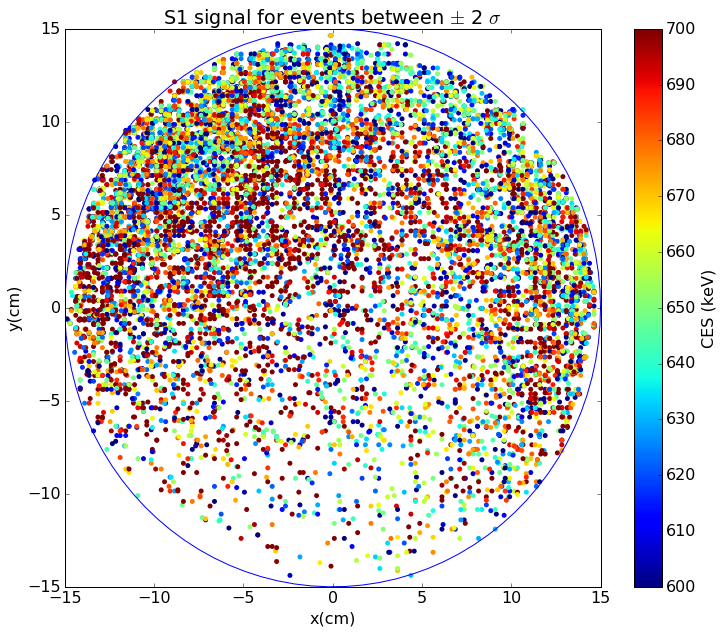

In [84]:
plt.scatter(dataE2s['x'],dataE2s['y'],c=CESselect2s,edgecolor='none', marker='.', s=100, vmin=600, vmax=700 )
plt.xlabel('x(cm)')
plt.ylabel('y(cm)')
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.colorbar(label='CES (keV)')

theta = np.linspace(0, 2*np.pi, 100)

x = 15*np.cos(theta)
y = 15*np.sin(theta)
plt.plot(x, y)
plt.title('S1 signal for events between $\pm$ 2 $\sigma$')

plt.show()

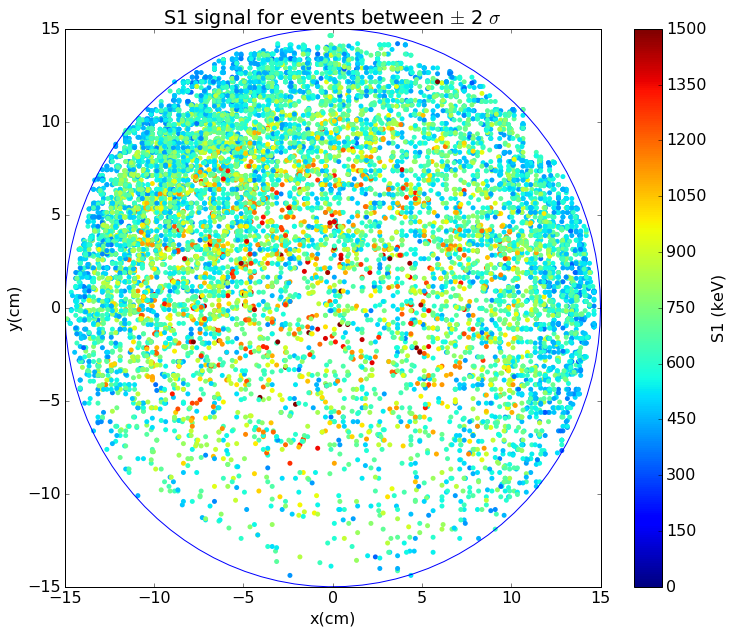

In [85]:
plt.scatter(dataE2s['x'],dataE2s['y'], c=dataE2s['s1']/mte1*662, 
            edgecolor='none', marker='.', s=100, vmin=0, vmax=1500 )
plt.xlabel('x(cm)')
plt.ylabel('y(cm)')
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.colorbar(label='S1 (keV)')
theta = np.linspace(0, 2*np.pi, 100)

x = 15*np.cos(theta)
y = 15*np.sin(theta)
plt.plot(x, y)
plt.title('S1 signal for events between $\pm$ 2 $\sigma$')
plt.show()

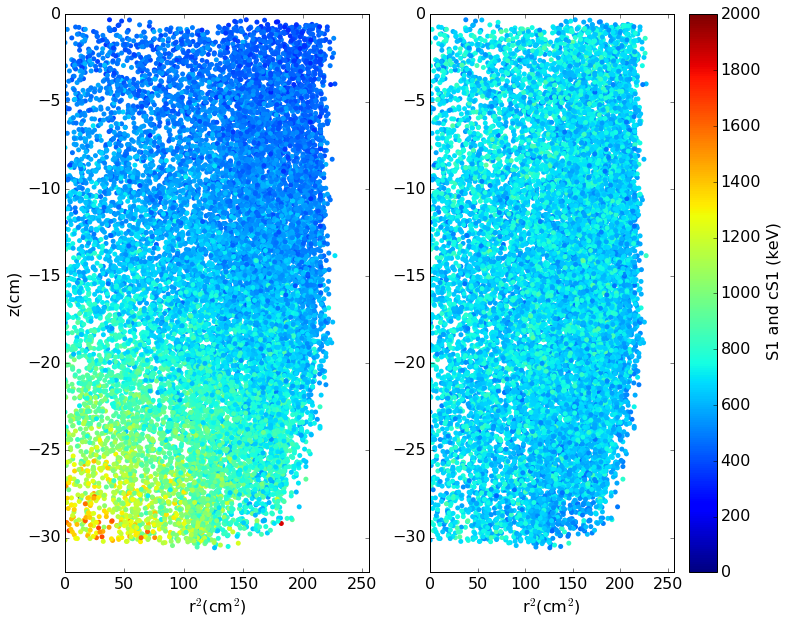

In [86]:
plt.title('S1 signal for events between $\pm$ 2 $\sigma$')
plt.subplot(121)

plt.scatter(dataE2s['x']**2+dataE2s['y']**2,dataE2s['z'], c=dataE2s['s1']/mte1*662, 
            edgecolor='none', marker='.', s=100, vmin=0, vmax=2000 )
plt.ylabel('z(cm)')
plt.xlabel('r$^2$(cm$^2$)')
plt.ylim(-32,0)
plt.xlim(0,16**2)


plt.subplot(122)
plt.scatter(dataE2s['x']**2+dataE2s['y']**2,dataE2s['z'], c=dataE2s['cs1']/mte1*662, 
            edgecolor='none', marker='.', s=100, vmin=0, vmax=2000 )
plt.xlabel('r$^2$(cm$^2$)')
plt.ylim(-32,0)
plt.xlim(0,16**2)
plt.colorbar(label=' S1 and cS1 (keV)')
plt.show()